<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import pandas as pd
import psycopg2

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [4]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(id)
FROM public.vacancies
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

<ipython-input-5-7f364a65e0f6>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers).

In [6]:
# текст запроса
query_3_2 = f'''
SELECT COUNT(id)
FROM public.employers
'''

In [8]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

<ipython-input-8-e0e2d23c59c3>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3_3 = f'''
SELECT COUNT(id)
FROM public.areas
'''

In [10]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

<ipython-input-10-11c9948ba1f3>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_3_4 = f'''
SELECT COUNT(id)
FROM public.industries
'''

In [12]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

<ipython-input-12-aae953b7cc87>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

In [ ]:
# выводы по предварительному анализу данных

### Выводы по предварительному анализу:

* В таблице vacancies содержится **49197** вакансий.
* В таблице employers содержится **23501** работодателей.
* В таблице areas содержится **1362** регионов.
* В таблице industries содержится **294** сфер деятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [17]:
# текст запроса
query_4_1 = f'''
SELECT
    a.name area,
    COUNT(v.id) cnt
FROM public.vacancies v JOIN public.areas a on v.area_id = a.id
GROUP BY a.id
ORDER BY cnt DESC
'''

In [18]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

<ipython-input-18-c5d40976a413>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Кизляр,1
765,Джизак,1
766,Эртиль,1
767,Арсеньев,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [19]:
# текст запроса
query_4_2 = f'''
SELECT
    COUNT(v.id) cnt
FROM public.vacancies v
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [20]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

<ipython-input-20-bebb05645b92>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [31]:
# текст запроса
query_4_3 = f'''
SELECT
    AVG(v.salary_from),
    AVG(v.salary_to)
FROM public.vacancies v
'''

In [32]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

<ipython-input-32-3cb76ea8c081>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,avg,avg
0,71064.657901,110536.741923


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [11]:
# текст запроса
query_4_4 = f'''
SELECT DISTINCT
    v.schedule,
    v.employment,
    COUNT(v.id)
FROM public.vacancies v
GROUP BY v.schedule, v.employment
ORDER BY COUNT(v.id) DESC
'''

In [12]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

<ipython-input-12-ddd5034b1d4e>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [13]:
# текст запроса
query_4_5 = f'''
SELECT
    v.experience,
    COUNT(v.id)
FROM public.vacancies v
GROUP BY v.experience
ORDER BY COUNT(v.id)
'''

In [14]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

<ipython-input-14-868d7ae2deeb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [ ]:
# выводы по детальному анализу вакансий

### Выводы по детальному анализу вакансий:

* Регионы с наибольшим количеством вакансий: **Москва, Санкт-Петербург, Минск, Новосибирск, Алматы**.
* У 24073 вакансий заполнено хотя бы одно из двух полей с зарплатой.
* Средние значения для нижней и верхней границы зарплатной вилки: **71065 и 110537**.
* Наибольшее количество вакансий сочетают в себе следующие условия работы: **Полный день - Полная занятость**.
* Наиболее часто в вакансия требуется опыт работы **От 1 года до 3 лет**.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [42]:
# текст запроса
query_5_1 = f'''
(SELECT
    e.name,
    COUNT(v.id),
    '1st' position_name
FROM public.vacancies v JOIN  public.employers e ON v.employer_id = e.id
GROUP BY e.id
ORDER BY COUNT(v.id) DESC
LIMIT 1)
UNION ALL
(SELECT
    e.name,
    COUNT(v.id),
    '5th'
FROM public.vacancies v JOIN  public.employers e ON v.employer_id = e.id
GROUP BY e.id
ORDER BY COUNT(v.id) DESC
OFFSET 4 LIMIT 1)
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

<ipython-input-43-ad08e28dab7b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,name,count,position_name
0,Яндекс,1933,1st
1,Газпром нефть,331,5th


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [4]:
# текст запроса
query_5_2 = f'''
SELECT
    a.name,
    COUNT(DISTINCT e.id) cnt_emp,
    COUNT(DISTINCT v.id) cnt_vac
FROM public.areas a LEFT JOIN public.vacancies v ON v.area_id = a.id
    LEFT JOIN public.employers e ON e.area = a.id
GROUP BY a.id
ORDER BY COUNT(v.id), COUNT(e.id) DESC
LIMIT 15
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

<ipython-input-5-5d775e2f9142>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,name,cnt_emp,cnt_vac
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
5,Ростовская область,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [8]:
# текст запроса
query_5_3 = f'''
SELECT
    e.name,
    COUNT(DISTINCT v.area_id) cnt_area
FROM public.employers e LEFT JOIN public.vacancies v ON e.id = v.employer_id
GROUP BY e.id
ORDER BY COUNT(DISTINCT v.area_id) DESC
LIMIT 15
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

<ipython-input-9-31d3e779128f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,name,cnt_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,КРОН,48
9,Почта России,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [20]:
# текст запроса
query_5_4 = f'''
SELECT
    COUNT(DISTINCT e.id) cnt_NULL
FROM public.employers e LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL
'''

In [21]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

<ipython-input-21-ef2fed5e214c>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,cnt_null
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [26]:
# текст запроса
query_5_5 = f'''
SELECT
    e.name,
    COUNT(DISTINCT ei.industry_id) cnt_emp_ind
FROM public.employers e LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id
HAVING COUNT(DISTINCT ei.industry_id) = 4
ORDER BY 1
OFFSET 2 LIMIT 1
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

<ipython-input-27-a41bab2be398>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name,cnt_emp_ind
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [30]:
# текст запроса
query_5_6 = f'''
SELECT
    COUNT(DISTINCT e.id) cnt
FROM public.employers e LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
    LEFT JOIN public.industries i ON i.id = ei.industry_id
WHERE i.name = 'Разработка программного обеспечения'
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

<ipython-input-31-8e05d7ddda4a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API.

In [4]:
# код для получения списка городов-милионников
!pip install requests
!pip install beautifulsoup4
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
page = BeautifulSoup(response.text, 'html.parser')
tables = page.findChildren('table')
my_table = tables[0]
rows = my_table.findChildren(['th', 'tr'])
# получаем список городов
cities = []
for row in rows:

  cells = row.findChildren('td')
  for cell in cells:
      value = cell.string
      value = str(value)
      if (value.istitle() or value == 'Ростов-на-Дону') and value != 'None':
         cities.append(value)

print(cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [9]:
# текст запроса
cities = str(cities)
cities = cities.replace('[', '')
cities = cities.replace(']', '')
query_5_7 = f'''
WITH tab_1 AS
(SELECT
    a.name,
    COUNT(DISTINCT v.id) cnt_vac
FROM public.areas a LEFT JOIN public.vacancies v ON a.id = v.area_id
    LEFT JOIN public.employers e ON e.id = v.employer_id
WHERE e.name = 'Яндекс' AND a.name in ({cities})
GROUP BY a.id
ORDER BY 2)
SELECT * FROM tab_1
UNION ALL
SELECT
    'Total',
    SUM(cnt_vac)
FROM tab_1
'''

In [10]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

<ipython-input-10-df759ebf7dc8>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,name,cnt_vac
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

In [ ]:
# выводы по анализу работодателей

### Выводы по нализу работодателей:

* **Яндекс** находятся на первом месте по количеству вакансий.
* Среди регионов, в которых нет вакансий, тот, в котором наибольшее количество работодателей - **Россия**.
* Максимальное количество регионов, в которых один работадатель публикует свои вакансии - **181** (Яндекс).
* Количества работодателей, у которых не указана сфера деятельности - **8419**.
* У **3553** работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».
* Яндекс представляет **485** вакансий в городах-миллионниках.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [19]:
# текст запроса
query_6_1 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE LOWER(v.name) LIKE '%data%' OR LOWER(v.name) LIKE '%данн%'
'''

In [20]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

<ipython-input-20-631a6abf7434>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста?
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.


In [78]:
# текст запроса
query_6_2 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE ((LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%') AND
    (LOWER(v.name) LIKE '%junior%' OR v.experience = 'Нет опыта' OR v.schedule = 'Стажировка')
'''

In [79]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

<ipython-input-79-d5ce39ec296d>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [40]:
# текст запроса
query_6_3 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE (((LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%')) OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%')
    AND ((v.key_skills LIKE '%SQL%') OR (LOWER(v.key_skills) LIKE '%postgres%'))
'''

In [41]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

<ipython-input-41-93be484d31ff>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [38]:
# текст запроса
query_6_4 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE (((LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%')) OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%')
    AND (v.key_skills LIKE '%Python%')
'''

In [39]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

<ipython-input-39-a429304bcb54>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [36]:
# текст запроса
query_6_5 = f'''
SELECT
    ROUND(AVG(LENGTH(v.key_skills) - LENGTH(REPLACE(v.key_skills, CHR(9), '')) + 1), 2)
FROM public.vacancies v
WHERE (((v.name LIKE '%ML%' AND LOWER(v.name) NOT LIKE '%html%')) OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%')
    AND (v.key_skills IS NOT NULL)
'''

In [37]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

<ipython-input-37-99a1fdc5a2fc>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [34]:
# текст запроса
query_6_6 = f'''
SELECT
    v.experience,
    ROUND(AVG((COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from))/2))
FROM public.vacancies v
WHERE (((v.name LIKE '%ML%' AND LOWER(v.name) NOT LIKE '%html%')) OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%')
    AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

<ipython-input-35-c2f1a4577ae9>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [ ]:
# выводы по предметному анализу

### Выводы по предметному нализу:

* **1771** вакансия имеет отношение к данным.
* В представленных данных есть **51** подходящая вакансия для начинающего дата-сайентиста.
* В представленных данных есть **229** вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres.
* В представленных данных есть **357** вакансий для DS, в которых в качестве ключевого навыка указан Python.
* **6.41** ключевых навыков в среднем указывают в вакансиях для DS.
* Дата-сайентист с опытом работы от 3 до 6 лет, в среднем может рассчитывать на зарплату **243115** рублей.

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

### Общие выводы
* В базе **49197** вакансий, **23501** работодатель, **1362** региона и **294** сферы деяьельности.
* Больше всего вакансий в **Москве**.
* Средняя нижняя и верхняя границы зарплат: **71065 рублей и 110537 рублей**.
* Наибольшее количество вакансий с опытом **от 1 года до 3 лет**.
* Больше всего вакансий размещает **Яндекс**.
* **1771** вакансия имеет отношение к данным.

### Дополнительные исследования данных

In [15]:
# Разница средней зп и срдней зп в DS
# Какие компании ищут DS специалистов
import matplotlib.pyplot as plt

In [33]:
# Разница средней зп и срдней зп в DS
# текст запроса
query_7_1 = f'''
SELECT
    v.experience,
    ROUND(AVG((COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from))/2))
FROM public.vacancies v
WHERE (((v.name LIKE '%ML%' AND LOWER(v.name) NOT LIKE '%html%')) OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%')
    AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience
ORDER BY 1
'''

# результат запроса
df_DS = pd.read_sql_query(query_7_1, connection)
df_DS

<ipython-input-33-74d5977d3987>:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_DS = pd.read_sql_query(query_7_1, connection)


,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


In [32]:
# текст запроса
query_7_1 = f'''
SELECT
    v.experience,
    ROUND(AVG((COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from))/2))
FROM public.vacancies v
WHERE (v.experience != 'Более 6 лет')
    AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience
ORDER BY 1
'''

# результат запроса
df_all = pd.read_sql_query(query_7_1, connection)
df_all

<ipython-input-32-62c4700bf490>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all = pd.read_sql_query(query_7_1, connection)


,experience,round
0,Нет опыта,40472.0
1,От 1 года до 3 лет,76541.0
2,От 3 до 6 лет,133211.0


([<matplotlib.axis.XTick at 0x78d86b2d8750>,
 [Text(0, 0, 'Нет опыта'),
  Text(1, 0, 'От 1 года до 3 лет'),
  Text(2, 0, 'От 3 до 6 лет')])

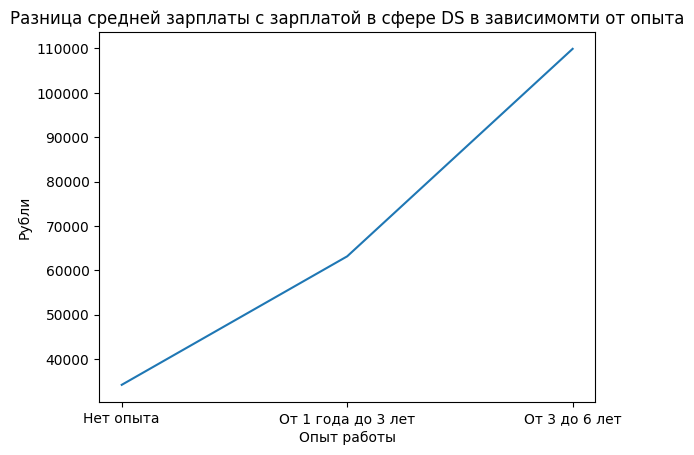

In [29]:
df_dif = df_DS['round'] - df_all['round']
plt.plot(df_dif)
plt.title("Разница средней зарплаты с зарплатой в сфере DS в зависимомти от опыта")
plt.xlabel('Опыт работы')
plt.ylabel('Рубли')
plt.xticks([0, 1, 2], ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет'])

In [31]:
# Какие компании ищут DS специалистов?
query_7_2 = f'''
(SELECT
    e.name,
    COUNT(v.id)
FROM public.vacancies v JOIN  public.employers e ON v.employer_id = e.id
WHERE (((v.name LIKE '%ML%' AND LOWER(v.name) NOT LIKE '%html%')) OR
    LOWER(v.name) LIKE '%data scientist%' OR LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR LOWER(v.name) LIKE '%machine learning%' OR
    LOWER(v.name) LIKE '%машинн%обучен%')
GROUP BY e.id
ORDER BY COUNT(v.id) DESC
LIMIT 10)
'''

df = pd.read_sql_query(query_7_2, connection)
df

<ipython-input-31-6f76ba5eb1cf>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_2, connection)


,name,count
0,СБЕР,37
1,Bell Integrator,25
2,Банк ВТБ (ПАО),18
3,VK,15
4,Positive Technologies,11
5,EvenBet Gaming,9
6,Яндекс,9
7,МегаФон,8
8,Andersen,7
9,МТС,6


### Выводы по дополнительным исследованиям:

Из расчетов видно, что специалисты в сфере DS претендуют на более высокие зарплаты, чем в среднем по рынку труда. Более того, из графика видно, что с увеличением опыта работы, разрыв в зарплатах только **увеличивается**!

Также мы посмотрели, какие компании нуждаются в специалистах DS: больше всего вакансий для DS специалистов публикует **СБЕР**. Эти результаты хорошо сочетаются с исследованием зарплат, так как в банковской сфере зарплаты выше, чем в среднем по рынку, а у нас в тройке лидеров два банка - **СБЕР и ВТБ**.

В итоге хочу сказать, что DS является **прибыльной** отраслью!